<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/mobile2.png?raw=true" width=800 align="left"/>

# 실습 내용

- Grid Search로 Decision Tree 알고리즘 모델을 튜닝합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/mobile.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,0
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,0
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,0
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,1
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,0


In [4]:
# 기술통계 확인
data.describe()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,CHURN
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.502400,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250,0.492600
std,5773.647028,0.500007,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558,0.499958
min,1.000000,0.000000,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000,0.000000
25%,5000.750000,0.000000,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000,0.000000
50%,10000.500000,1.000000,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000,0.000000
75%,15000.250000,1.000000,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000,1.000000
max,20000.000000,1.000000,159983.000000,335.000000,89.000000,999996.000000,899.000000,29.000000,15.000000,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 변수 제거**

In [5]:
# 제거 대상: id
del_cols = ['id']

# 변수 제거
data.drop(del_cols, axis=1, inplace=True)

# 확인
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,0,31953,0,6,313378,161,0,4,unsat,little,no,0
1,1,36147,0,13,800586,244,0,6,unsat,little,considering,0
2,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,0
3,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,1
4,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,0


**2) x, y 분리**

In [21]:
# Target 설정
target= 'CHURN'

# 데이터 분리
x = data.drop(target,axis=1)
y = data[target]

**3) 가변수화**

In [25]:
# 가변수화 대상: REPORTED_SATISFACTION, REPORTED_USAGE_LEVEL, CONSIDERING_CHANGE_OF_PLAN
s_coll = ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']
# 가변수화
x = pd.get_dummies(x,columns=s_coll,drop_first=True)

# 확인
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   COLLEGE                                   20000 non-null  int64
 1   INCOME                                    20000 non-null  int64
 2   OVERAGE                                   20000 non-null  int64
 3   LEFTOVER                                  20000 non-null  int64
 4   HOUSE                                     20000 non-null  int64
 5   HANDSET_PRICE                             20000 non-null  int64
 6   OVER_15MINS_CALLS_PER_MONTH               20000 non-null  int64
 7   AVERAGE_CALL_DURATION                     20000 non-null  int64
 8   REPORTED_SATISFACTION_sat                 20000 non-null  uint8
 9   REPORTED_SATISFACTION_unsat               20000 non-null  uint8
 10  REPORTED_SATISFACTION_very_sat            20000 non-null  

**4) 학습용, 평가용 데이터 분리**

In [26]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.3)

# 4.성능 예측

- k-Fold Cross Validation을 사용해 모델의 성능을 예측합니다.

In [39]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

In [40]:
# 선언하기
model_dt = DecisionTreeClassifier()

In [41]:
# 성능예측
cv_score = cross_val_score(model_dt,x_train,y_train,cv=5)

In [42]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.61321429 0.61821429 0.60571429 0.61857143 0.62857143]
0.6168571428571428


# 5.모델 튜닝


- Grid Search로 튜닝을 진행합니다. 

**1) 모델 튜닝**

In [45]:
# 파라미터 선언
  # n_neighbors: range(3, 21)
param = {'max_depth':range(3,21)}

# Random Search 선언
  # cv=5
  # scoring='accuracy'
model = GridSearchCV(
  model_dt,
  param,
  cv=5,
  scoring='accuracy'
)

In [46]:
# 학습하기
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(3, 21)}, scoring='accuracy')

**2) 결과 확인**

In [50]:
# mean_test_score 확인
model.cv_results_

{'mean_fit_time': array([0.02204208, 0.0262033 , 0.03370652, 0.03749957, 0.04194527,
        0.04567857, 0.05156302, 0.05823555, 0.05977802, 0.06742382,
        0.06976876, 0.07051649, 0.07340422, 0.07954183, 0.0981379 ,
        0.08547316, 0.0863699 , 0.09145756]),
 'std_fit_time': array([0.00066289, 0.00074077, 0.00102333, 0.00119671, 0.00160276,
        0.00039917, 0.00132141, 0.00067947, 0.00170284, 0.00133233,
        0.00191761, 0.00039992, 0.00101727, 0.0031828 , 0.00619921,
        0.00097664, 0.00337293, 0.00438806]),
 'mean_score_time': array([0.00219483, 0.00199466, 0.00200081, 0.00219421, 0.00219431,
        0.00220013, 0.00199504, 0.00239387, 0.00198855, 0.00238771,
        0.00219417, 0.0025866 , 0.00199442, 0.00239229, 0.00458755,
        0.00239382, 0.00219421, 0.00299854]),
 'std_score_time': array([7.46621040e-04, 5.91739352e-07, 1.13352928e-05, 3.98731431e-04,
        3.99280004e-04, 3.96122837e-04, 5.51978917e-07, 7.98153968e-04,
        1.14018934e-05, 4.93546923e-

In [52]:
# 중요 정보 확인
print('=' * 80)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 80)

[0.68907143 0.69964286 0.69621429 0.69757143 0.69764286 0.69457143
 0.68792857 0.67928571 0.67592857 0.66907143 0.6585     0.65607143
 0.65142857 0.64507143 0.63407143 0.63457143 0.63164286 0.62728571]
--------------------------------------------------------------------------------
최적파라미터: {'max_depth': 4}
--------------------------------------------------------------------------------
최고성능: 0.6996428571428571


In [49]:
# 최고 성능
y_pred = model.best_estimator_.predict(x_test)
# 불러오기
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.63      0.68      3065
           1       0.67      0.78      0.72      2935

    accuracy                           0.70      6000
   macro avg       0.71      0.70      0.70      6000
weighted avg       0.71      0.70      0.70      6000

[[1930 1135]
 [ 646 2289]]


**3) 변수 중요도**

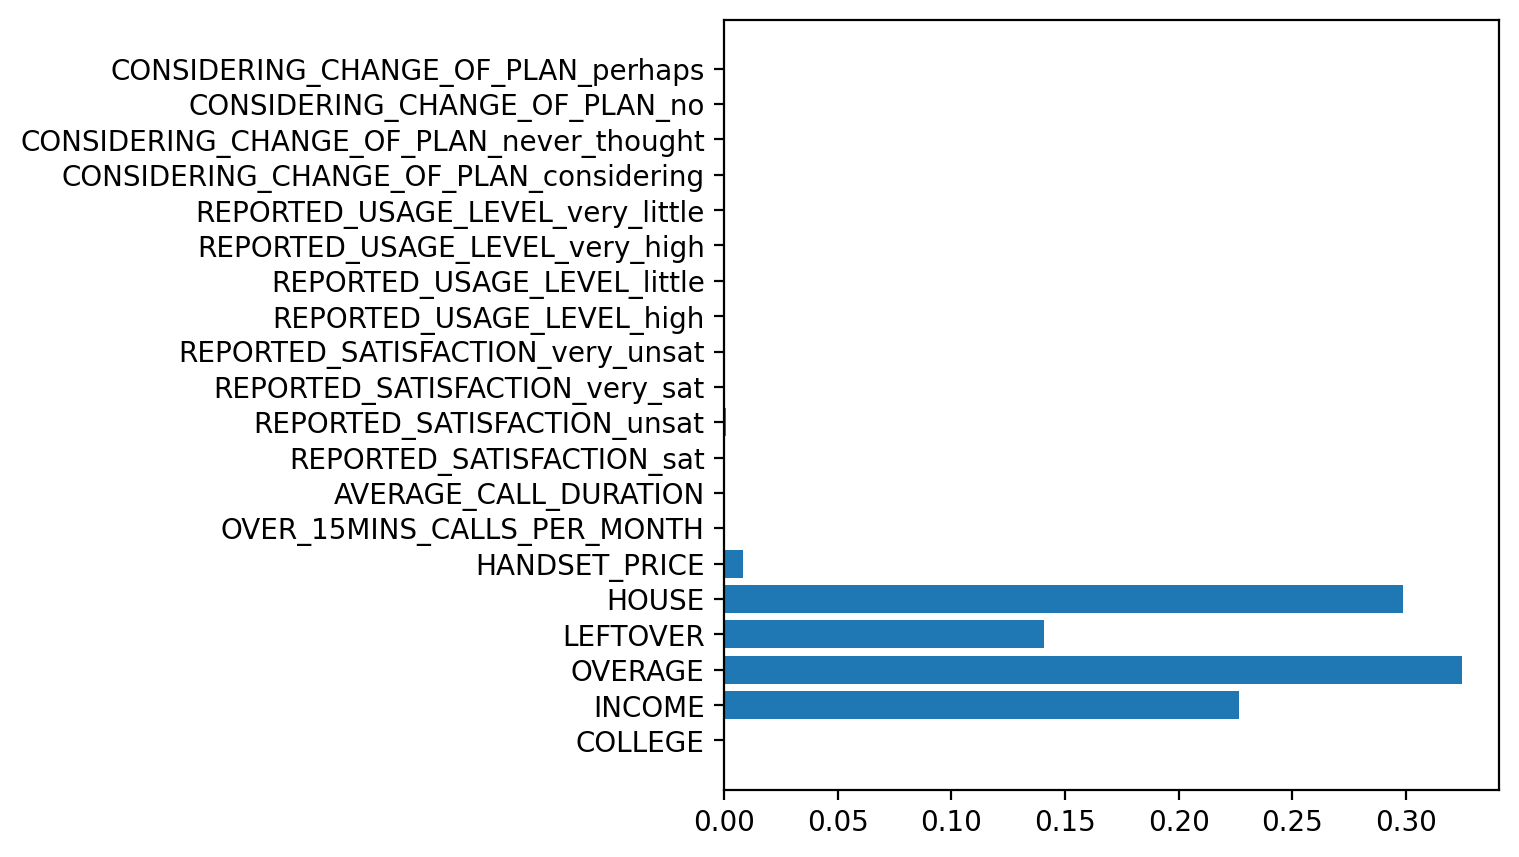

In [53]:
# 변수 중요도
plt.figure(figsize=(5, 5))
plt.barh(y=list(x), width=model.best_estimator_.feature_importances_)
plt.show()

# 6. 성능 평가

- 학습을 통해 예상한 성능과 실제 평가에 따른 성능은 차이가 있을 수 있습니다.
- 예선전에서 성적이 좋았다고 본선에서도 성적이 좋다고 보장할 수는 없겠지요?

In [54]:
# 예측하기
y_pred = model.predict(x_test)

In [56]:
# 평가하기
print('MAE:', confusion_matrix(y_test, y_pred))
print('R2-Score:', classification_report(y_test, y_pred))

MAE: [[1930 1135]
 [ 646 2289]]
R2-Score:               precision    recall  f1-score   support

           0       0.75      0.63      0.68      3065
           1       0.67      0.78      0.72      2935

    accuracy                           0.70      6000
   macro avg       0.71      0.70      0.70      6000
weighted avg       0.71      0.70      0.70      6000

